<p><img alt="Colaboratory logo" height="240px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="12px" vspace="0px"></p>

#**Osciladores armónicos analizados con serie de Fourier**
___________________________________________________________________
*Nombre: Sofia Bustos Aponte, Melanie Andrea Muñoz Chavarria.*

*Métodos computacionales 2023-2*

*Instituto de Física.*

*Facultad de Ciencias Exactas y Naturales.*

In [1]:
#@title Librerías
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sp
import urllib.request
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

#**Serie de Fourier**
Las series de Fourier se emplean para el análisis de funciones periódicas, a través de la descomposición de la función en una suma infinita, de funciones senoidales mucho más simples (como combinación de senos y cosenos con frecuencias enteras).

El nombre se debe al matemático francés Jean-Baptiste Joseph Fourier que desarrolló la teoría cuando estudiaba la ecuación del calor. Fue el primero que estudió tales series sistemáticamente, y publicando sus resultados iniciales en 1807 y 1811. Esta área de investigación se llama algunas veces Análisis armónico.



##**Serie de Fourier en forma exponencial**

Dada la identidad de Euler, para determinar la serie de fourier de cualquier
[función periódica ](https://es.wikipedia.org/wiki/Serie_de_Fourier#:~:text=Las%20series%20de%20Fourier%20constituyen,y%20cosenos%20con%20frecuencias%20enteras), tenemos que:


\begin{equation}
    f(t) \approx \sum_{n=-\infty}^{\infty}  c_n e^{2\pi i \frac{n}{T}t}
    \tag{1}.
\end{equation}

\begin{equation}
    c_n = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} f(t) e^{-2\pi i \frac{n}{T}t} \,dt
    \tag{2}.
\end{equation}

Entonces para una señal cuadra se presenta la siguiente aproximación por medio de la serie:



In [2]:
# Señal cuadrada en función del periodo P y del tiempo t
def f_cuadrada(t, T):
    return 0.5 * (1 + np.sign(np.sin(2*np.pi*t/T)))

In [3]:
# Coeficientes, donde t_f lo toma como constante. Funciona en el ciclo de la función serie_fourier
#Usando la ecuación 2
def c(n, T):
    integrando = lambda t_ff: f_cuadrada(t_ff,T) * np.exp(-1j*2*np.pi*n*t_ff/T)
    resultado = sp.integrate.quadrature(integrando, -T/2, T/2)[0]
    return resultado / T

In [4]:
# Funciona para la señal cuadrada
#Usando la ecuación 1
def serie_fourier(t, T, N):
    series = np.zeros_like(t, dtype=np.complex128) # ceros expresados como complejos con más precisión
    for n in range(-N, N + 1):
        series += c(n, T) * np.exp(1j*2*np.pi*n*t/T)
    return series

###**Ejemplo 1:** para una señal cuadrada discontinua

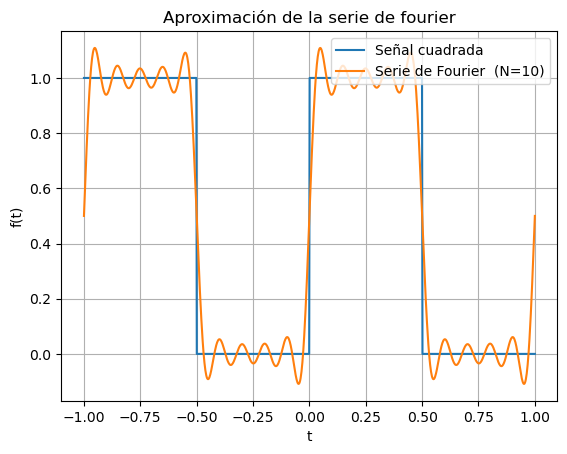

In [13]:
P = 1 # periodo
N = 10 # número de términos para la serie de fourier
t_ff = np.linspace(-P,P, 1000)

#Aproximación con serie de Fourier
aprox= serie_fourier(t_ff, P, N)

# Gráfica de la serie y la función
plt.plot(t_ff, f_cuadrada(t_ff, P), label= "Señal cuadrada")
plt.plot(t_ff, aprox, label= f"Serie de Fourier  (N={N})")
plt.title("Aproximación de la serie de fourier")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc="upper right")
plt.grid()


##**Serie de Fourier: definición**
Dada la serie

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} \left( a_n \cos(\omega t n) + b_n \sin(\omega t n) \right)
\tag{3}.
\end{equation}

con $\omega= 2\pi/T$, con $T$ el periodo.

Donde los coeficientes $a_0,b_n, a_n$ están dados por:


\begin{equation}
{a}_{0} =\frac {2}{T} \int_{-T/2}^{T/2} f(t) \,dt \tag{4}.
\end{equation}


\begin{equation}
{a}_{n} =\frac {2}{T} \int_{-T/2}^{T/2} f(t) cos(\omega t n)\,dt \tag{5}.
\end{equation}


\begin{equation}
{b}_{n} =\frac {2}{T} \int_{-T/2}^{T/2} f(t) sin(\omega t n) \,dt
\tag{6}.
\end{equation}

In [14]:
#Serie de Fourier
#Calculando los coeficientes

#Intervalo para calcular las integrales de los coeficientes
def intervalo_f(periodo,N):
  intervalo_f=np.linspace((-1)*periodo/2,periodo/2,N)
  return intervalo_f


#Coeficientes
#Donde función array es la evaluación de la función en los diferentes puntos de intervalo_f
def a0(funcion_array, intervalo_f,periodo):
  a0_=sp.integrate.simpson(funcion_array,intervalo_f)
  a0=(2/periodo)*a0_

  return a0


def an(n,funcion_array,intervalo_f, periodo):
  fn=lambda n,periodo,t: np.cos(((2*n*np.pi)/periodo)*t)
  g_t=funcion_array*fn(n,periodo,intervalo_f)

  an_=sp.integrate.simpson(g_t,intervalo_f)

  an=(2/periodo)*an_

  return an

def bn(n,funcion_array,intervalo_f, periodo):
  fn=lambda n,periodo,t: np.sin(((2*n*np.pi)/periodo)*t)
  g_t=funcion_array*fn(n,periodo,intervalo_f)

  bn_=sp.integrate.simpson(g_t,intervalo_f)

  bn=(2/periodo)*bn_

  return bn

#Serie
#Donde t_intervalo es el punto donde se desea evluar f(t)
def serie_de_fourier(n,funcion_array,periodo,t_intervalo, intervalo_f):
  serie=np.zeros(len(t_intervalo),dtype=np.complex128)
  for i,t in enumerate(t_intervalo):
    s=(a0(funcion_array, intervalo_f,periodo))/2



    for j in range(1,n+1):
      an_=an(j,funcion_array,intervalo_f, periodo)
      bn_=bn(j,funcion_array,intervalo_f, periodo)

      p=an_*np.cos(((2*j*np.pi)/periodo)*t)+bn_*np.sin(((2*j*np.pi)/periodo)*t)*1j

      s=s+p

    serie[i]=s

  return serie

##**Serie de Fourier: para una Señal Periodica Continua**
Nuevamente tomando:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} \left( a_n \cos(\omega t n) + b_n \sin(\omega t n) \right)
\tag{3}.
\end{equation}

Donde los coeficientes $a_0,b_n, a_n$ están dados por:


\begin{equation}
{a}_{0} =\frac {2}{T} \int_{0}^{T} f(t) \,dt \tag{7}.
\end{equation}


\begin{equation}
{a}_{n} =\frac {2}{T} \int_{0}^{T} f(t) cos(\omega t n)\,dt \tag{8}.
\end{equation}


\begin{equation}
{b}_{n} =\frac {2}{T} \int_{0}^{T} f(t) sin(\omega t n) \,dt
\tag{9}.
\end{equation}

In [25]:
def serie_fourier_s(funcion,armonicos,periodo,variable_ind):
  #Coefientes de fourier
  #Usando las ecuaciones 7,8,9
  n=sy.Symbol('n')
  a0=sy.integrate((2/periodo)*funcion, (variable_ind, 0,periodo))
  an=sy.integrate((2/periodo)*funcion * sy.cos(2 * n *variable_ind), (variable_ind, 0,periodo))
  bn=sy.integrate((2/periodo)*funcion * sy.sin(2 * n *variable_ind), (variable_ind, 0,periodo))

  #Serie de fourier
  #Usando la ecuación 3
  serie = (a0/2)
  for i in range(1, armonicos + 1):
    serie = serie + (an*sy.cos(2*n*t)).subs(n, i)
  for j in range(1, armonicos + 1):
    serie = serie + (bn*sy.sin(2*n*t)).subs(n, j)

  return serie

###**Ejemplo 2:** con una ecuación de un sistema masa-resorte

In [26]:
#Simbolos
t=sy.symbols('t')
w=2
T=sy.pi
#Valores iniciales
xi=1
vi=0
c1=xi
c2=vi/w
#Defiendo la ecunación del resorte
x=sy.Function('x')(t)
expr=c1*sy.cos(w*t)+c2*sy.sin(w*t)
x=x.subs(x,expr)
sy.pprint(f'La ecuación del resorte es {x}')

La ecuación del resorte es cos(2*t)


In [27]:
#Aproximación con la serie de Fourier
aproximacion=serie_fourier_s(x,10,sy.pi,t)
sy.pprint(f'La ecuación que se logra con la aproximación con series de Fourier es:{aproximacion}')

La ecuación que se logra con la aproximación con series de Fourier es:cos(2*t)


#**Osciladores armónicos**

Es un sistema eléctrico, mécanico o de otro tipo. El cual tras liberarse de una posición de equilibrio regresa a ella.

Al regresar a la posición de equilibrio describe oscilaciones sinusoidales o sinusoidales amortiguadas.


##**Circuito RC**
Los generadores de potencia ideales tienen que proporcionan sinusoides puras. En la práctica proporcionan sinusoides distorsionas, pero periódicas.

([], [])

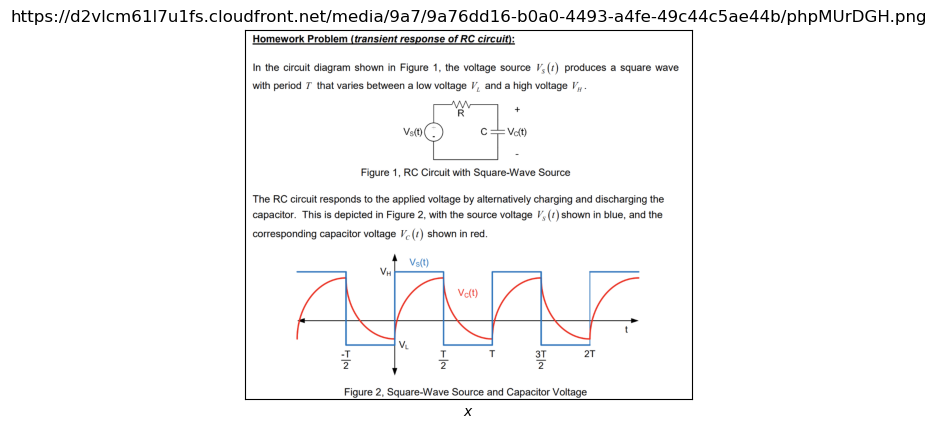

In [28]:
#@title Figura 1.Circuto RC, voltaje de entrada y sálida
circuito = "https://d2vlcm61l7u1fs.cloudfront.net/media/9a7/9a76dd16-b0a0-4493-a4fe-49c44c5ae44b/phpMUrDGH.png"
urllib.request.urlretrieve(circuito, "circuito.png")
imagen_c=plt.imread("circuito.png")

plt.figure()
plt.title(circuito )
plt.imshow(imagen_c)
plt.xlabel('$x$')
plt.yticks([])
plt.xticks([])

Funciones pra el voltaje de sálida y voltaje de entrada

In [29]:
# Prueba con valores
vm = 21 # [V]
N = 4000 # número de términos
L = 0.2 # [H]
C = 0.5
R = 3 # ohms
w = np.radians(1/np.sqrt(L*C)) # rad/s

In [30]:
#Señal de salida
def VS(t):
  suma = 0
  for i in range(1,N+1):
    suma+= np.cos((2*i-1)*w*t-90)/(2*i-1)
  return (4*vm/np.pi)*suma

# En este caso la señal de entrada tiene simetría impar, por lo que b_n != 0

In [31]:
# Señal de salida
def VC(t):
  suma= 0
  for i in range(1,N+1):
    t_n= np.arctan((2*i-1)*w*R*C)
    suma+= np.cos((2*i-1)*w*t-90-t_n)/((2*i-1)*np.sqrt(1+((2*i-1)*w*R*C)**2))
  return (4*vm/np.pi)*suma

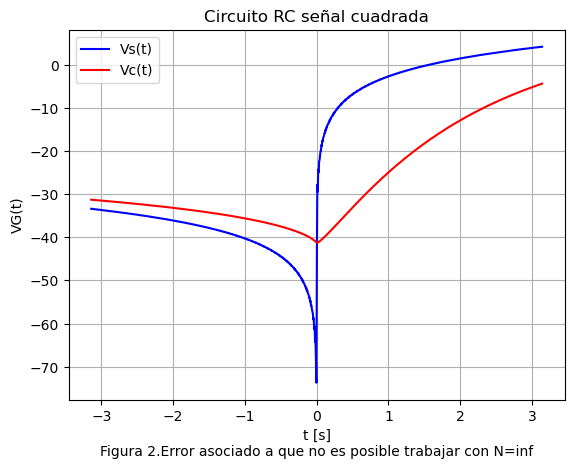

In [32]:
# Error asociado a que no es posible trabajar con N=inf
# Simetría de un cuarto de onda
t_c = np.linspace(-np.pi,np.pi,1000)

#Grafico
plt.plot(t_c,VS(t_c),c="b",label="Vs(t)")
plt.plot(t_c,VC(t_c),c="r",label="Vc(t)")
plt.title("Circuito RC señal cuadrada")
plt.xlabel('''t [s]
Figura 2.Error asociado a que no es posible trabajar con N=inf''')
plt.ylabel("VG(t)")
plt.legend()
plt.grid()

####**Ejemplo**
La señal de entrada es un pulso rectangular dado por la función:

$$
rect(t)= \begin{cases}
    0 & \text{si } |t| > \frac{1}{2} \\
    \frac{1}{2} & \text{si } |t| = \frac{1}{2} \\
    1 & \text{si } |t| < \frac{1}{2}
\end{cases}
$$

Como es una función continua por tramos, podemos determinar la señal de salida mediante series de fourier y también la frecuencia de resonancia.

In [33]:
# Función pulso rectangular
def rect(t,T):
  if (abs(t) % T <0.5).any():
    return 1 *(abs(t) % T <0.5)
  else:
    return 0
  if (abs(t) % T==0.5).any():
    return 0.5*(abs(t) % T==0.5)

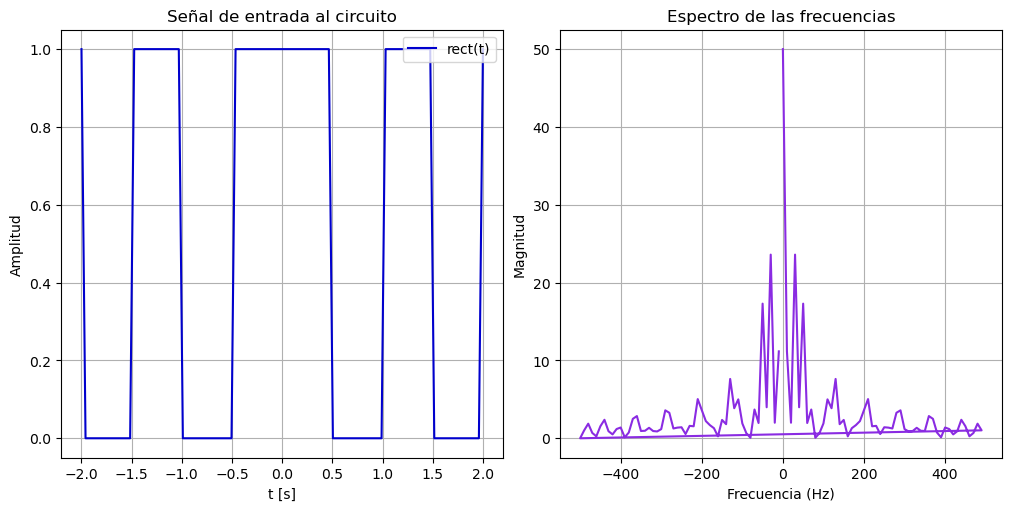

In [39]:
#@title Figura 3. Análisis señal de entrada del circuito
#@markdown En este caso la señal de entrada se describe por una función par, en la serie de Fourier an!=0

fig, axs = plt.subplots(1, 2,figsize=(10,5), layout='constrained')
axs[0].plot(t_ff,rect(t_ff,1),c="mediumblue",label="rect(t)")
axs[0].set_title("Señal de entrada al circuito")
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('Amplitud')
axs[0].legend(loc="upper right")
axs[0].grid(True)

# Transformada de Fourier

t_ff= np.linspace(-2,2,100)

fourier = np.fft.fft(rect(t_ff,1)) # T = 1
fre = np.fft.fftfreq(len(t_ff),1/1000) # Paso de 1/1000
axs[1].plot(fre, np.abs(fourier),c="blueviolet")
axs[1].set_title('Espectro de las frecuencias')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Magnitud')
axs[1].grid(True)


Aplicando la serie de Fourier para funciones periodicas a la señal de entrada

In [40]:
#Definiendo la función en sympy
t=sy.symbols('t')
rect_=sy.Piecewise((0, sy.Abs(t) > sy.S(1)/2), (sy.S(1)/2, sy.Abs(t) == sy.S(1)/2), (1, sy.Abs(t) < sy.S(1)/2))

#Haciendo la aproximación con la serie de Fourier
apox__=serie_fourier_s(rect_,4,1,t)

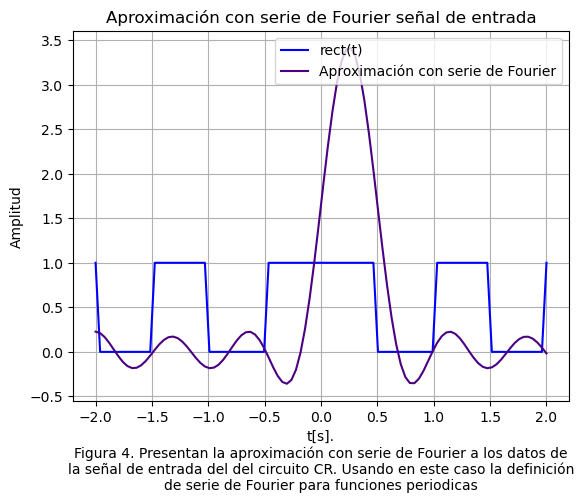

In [41]:
#Definiendo la función apartir del resultado de la serie
f_serie_=sy.lambdify(t,apox__, "numpy")
s_entrada=rect(np.linspace(-2,2,1000),1)

plt.figure()
plt.plot(t_ff,rect(t_ff,1),'-b',label='rect(t)')
plt.plot(t_ff,f_serie_(t_ff),c='indigo', label='Aproximación con serie de Fourier')
plt.xlabel('''t[s].
Figura 4. Presentan la aproximación con serie de Fourier a los datos de
la señal de entrada del del circuito CR. Usando en este caso la definición
de serie de Fourier para funciones periodicas''')
plt.ylabel('Amplitud')
plt.title('Aproximación con serie de Fourier señal de entrada')
plt.grid()
plt.legend(loc="upper right")

Ahora aplicando la serie de Fourier por definición, para aproximar a los datos. Se tiene que:

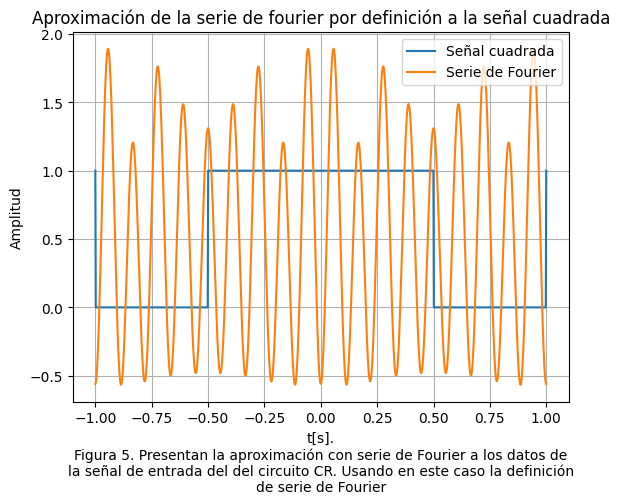

In [228]:
#Probandolo para el circutio con señal peridodica
P= 1 # periodo
N=10
n_= 10# número de términos para la serie de fourier
t_ff = np.linspace(-P,P, 1000)

i_coeficientes=intervalo_f(P,N)
f_coeficiente=f_cuadrada(i_coeficientes,P)

ap=serie_de_fourier(n_,f_coeficiente,P,t_ff,i_coeficientes)

plt.plot(t_ff,rect(t_ff,1), label= "Señal cuadrada")
plt.plot(t_ff, ap, label= "Serie de Fourier")
plt.title("Aproximación de la serie de fourier por definición a la señal cuadrada")
plt.xlabel('''t[s].
Figura 5. Presentan la aproximación con serie de Fourier a los datos de
la señal de entrada del del circuito CR. Usando en este caso la definición
de serie de Fourier''')
plt.ylabel('Amplitud')
plt.legend(loc="best")
plt.grid()


##**Sistema masa-resorte (ideal)**

Se está tomando un sistema masa-resorte donde no se presentan fuerzas de amortiguazión y tampoco un sistema forzado. Es decir, se cumple la ley de Hooke:

$${F}=-kx$$

Este sistema es conocido como el oscilador armónico ideal.

Considere un sistema oscilador mécanico como:

([], [])

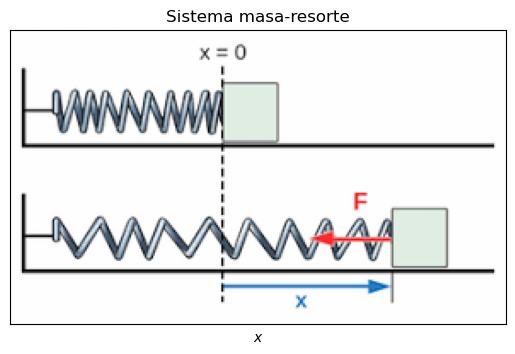

In [45]:
#@title Figura 6. Sistema masa-resorte
sistema='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSg4Up_eOpZLQ8RkMvBDm3gZyGvAibI1Hy8dw&usqp=CAU'
urllib.request.urlretrieve(sistema, 'sistema_masa-resorte.jpg')
imagen_sistema=plt.imread('sistema_masa-resorte.jpg')

plt.figure()
plt.title('Sistema masa-resorte')
plt.imshow(imagen_sistema)
plt.xlabel('$x$')
plt.yticks([])
plt.xticks([])

In [46]:
#Resolviendo la ecuación diferencial asociada al sistema
#Variables
t=sy.Symbol('t')
m=sy.Symbol('m', real=True, positive=True)
x=sy.Function('x')(t)
k=sy.Symbol('k', real=True, positive=True) #Constante del resorte

ecuacion=sy.Eq(x.diff(t,t)+(k/m)*x,0)
ecuacion

Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)

In [47]:
#Resolviendo la ecuación
solucion=sy.dsolve(ecuacion,x)
solucion

#@markdown Ecuación 10

Eq(x(t), C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m)))

In [48]:
#Solución del PVI
#Desplazamiento en x para todo tiempo
def x(k,m,xi,vi,t):
  w=np.sqrt(k/m)
  c1=xi
  c2=vi/w

  x=c1*np.cos(w*t)+c2*np.sin(w*t)

  return x

#Velocidad para todo timepo t

def v(k,m,xi,vi,t):
  w=np.sqrt(k/m)
  c1=xi
  c2=vi/w

  v=-c1*w*np.sin(w*t)+c2*w*np.cos(w*t)

  return v

def amplitud(k,m,xi,vi):
  w=np.sqrt(k/m)
  c1=xi
  c2=vi/w

  return np.square((c1**2)+(c2**2))

def periodo(k,m):
  w=np.sqrt(k/m)
  T=(2*np.pi)/w

  return T

###**Ejemplo**
Considerando los siguientes datos
- masa=0.5  $[kg]$
- Constante del resorte, k=200 $[N/m]$

Con valores iniciales:
- $x(0)=\pi$ $[m]$
- $x'(0)=0$ $[m/s]$

In [53]:
#Haciendo un caso particular
m_=0.5  #[kg]
k_=200 #[N/m]
xi_=np.pi/2 # [m]
vi_=0 # [m/s]

#Para un intervalo
t_intervalo=np.linspace(0,2*np.pi,1000)

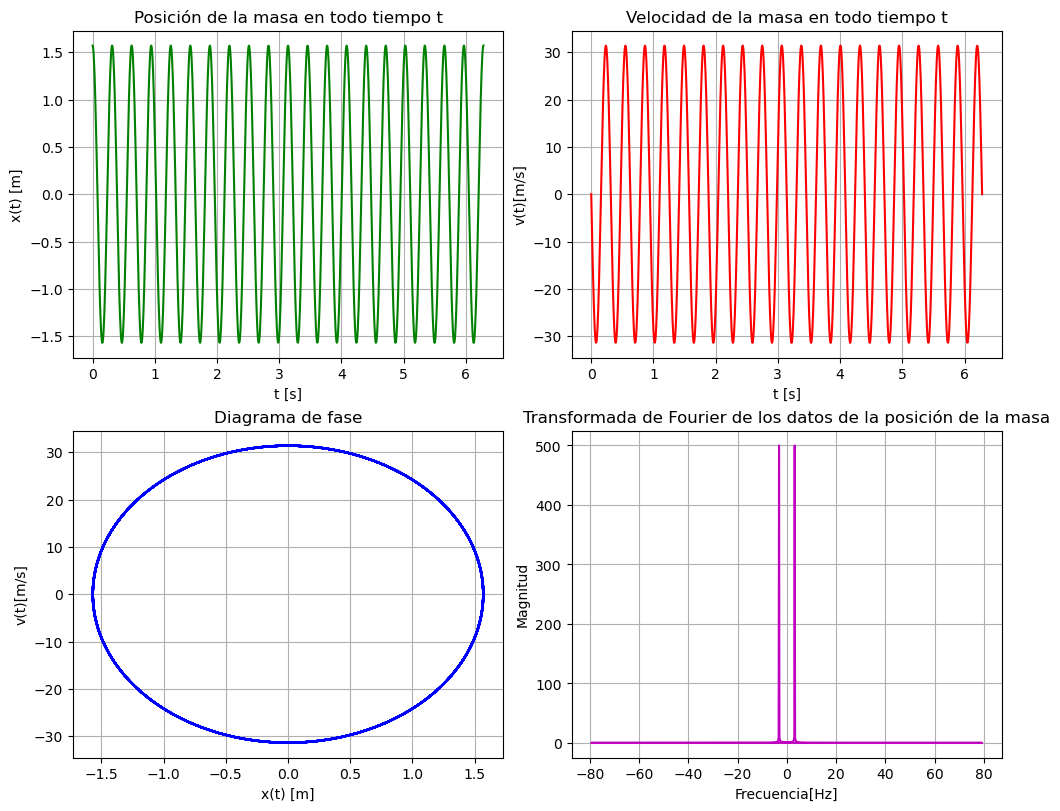

In [54]:
#@title Figura 7.Análisis de la masa en el resorte
fig, axs = plt.subplots(2, 2,figsize=(10, 8), layout='constrained')

axs[0,0].plot(t_intervalo,x(k_,m_,xi_,vi_,t_intervalo),'g')
axs[0,0].set_title('Posición de la masa en todo tiempo t')
axs[0,0].set_xlabel('t [s]')
axs[0,0].set_ylabel('x(t) [m]')
axs[0,0].grid(True)

axs[0,1].plot(t_intervalo,v(k_,m_,xi_,vi_,t_intervalo),'r')
axs[0,1].set_title('Velocidad de la masa en todo tiempo t')
axs[0,1].set_xlabel('t [s]')
axs[0,1].set_ylabel('v(t)[m/s]')
axs[0,1].grid(True)

axs[1,0].plot(x(k_,m_,xi_,vi_,t_intervalo),v(k_,m_,xi_,vi_,t_intervalo),'b')
axs[1,0].set_title('Diagrama de fase')
axs[1,0].set_xlabel('x(t) [m]')
axs[1,0].set_ylabel('v(t)[m/s]')
axs[1,0].grid(True)

#Calculando la transformada de Fourier
t_fourier_resorte=np.fft.fft(x(k_,m_,xi,vi,t_intervalo))

#Frecuencias de la trnasformada

f_resorte=np.fft.fftfreq(len(t_fourier_resorte),t_intervalo[1]-t_intervalo[0])

axs[1,1].plot(f_resorte,np.abs(t_fourier_resorte), 'm')
axs[1,1].set_title('Transformada de Fourier de los datos de la posición de la masa')
axs[1,1].set_xlabel('Frecuencia[Hz]')
axs[1,1].set_ylabel('Magnitud')
axs[1,1].grid(True)

Analisando este ejemplo con la serie de Fourier, para funciones periodicas

In [55]:
#Variables
t=sy.symbols('t')
w_=sy.sqrt(k_/m_)
P=(2*sy.pi/w)
c1_=xi_
c2_=vi_/w_


#Defiendo la ecunación del resorte
x_=sy.Function('x')(t)
expr_=c1_*sy.cos(w_*t)+c2_*sy.sin(w_*t)
x_=x_.subs(x_,expr_)
sy.pprint(f'La ecuación del resorte es {x_}')

La ecuación del resorte es 1.5707963267949*cos(20.0*t)


In [56]:
#Aproximación con serie de fourier para 10 terminos
aproximacion_=serie_fourier_s(x_,10,P,t)

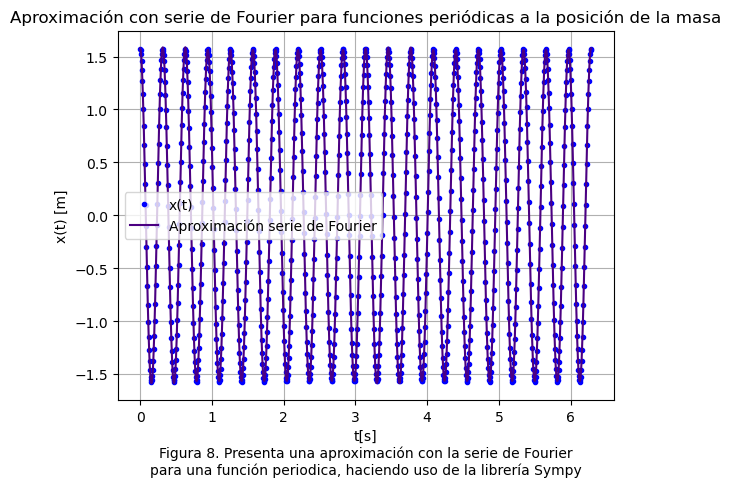

In [57]:
#Ahora definiendo aproximacion_ como funcion
f_serie=sy.lambdify(t, aproximacion_, "numpy")

#Posición en todo tiempo
posicion=x(k_,m_,xi_,vi_,t_intervalo)

plt.figure()
plt.title('Aproximación con serie de Fourier para funciones periódicas a la posición de la masa')
plt.plot(t_intervalo,posicion,'b.', label='x(t)')
plt.plot(t_intervalo,f_serie(t_intervalo),c='indigo',label='Aproximación serie de Fourier')
plt.xlabel('''t[s]
Figura 8. Presenta una aproximación con la serie de Fourier
para una función periodica, haciendo uso de la librería Sympy''')
plt.ylabel('x(t) [m]')
plt.grid()
plt.legend(loc='best')

Luego, dada la definición de serie de Fourier, donde se hace uso de la librería de numpy:

In [58]:
#Calculando la serie de Fourier
#Valores (cambiadolos)
m_=0.5 #[g]
k_=200 #[N/m]
xi_=np.pi/2 #[m]
vi_=0  #[m/s]
periodo_=periodo(k_,m_)
N_=100

#Serie de fourier con 5 terminos
n=10
intervalo_coeficientes=intervalo_f(periodo_,N_)
funcion_coeficientes=x(k_,m_,xi_,vi_,intervalo_coeficientes)
b=1.0e5
aprox_f=serie_de_fourier(n,funcion_coeficientes,periodo_,t_intervalo,intervalo_coeficientes)

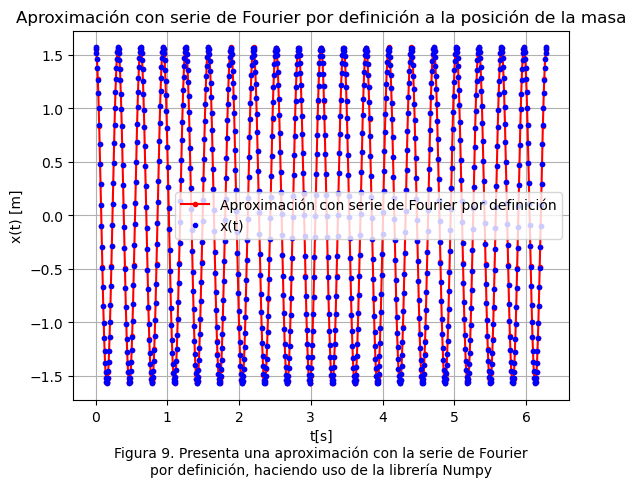

In [59]:
#Graficando los resultados
plt.figure()

plt.plot(t_intervalo,aprox_f,'.r-', label='Aproximación con serie de Fourier por definición')
plt.plot(t_intervalo,posicion,'b.', label='x(t)')
plt.title('Aproximación con serie de Fourier por definición a la posición de la masa')
plt.xlabel('''t[s]
Figura 9. Presenta una aproximación con la serie de Fourier
por definición, haciendo uso de la librería Numpy''')
plt.ylabel('x(t) [m]')
plt.grid()
plt.legend(loc='best')

Ahora, función posición x(t) aproximada con la serie de fourier en forma exponencial

/Users/neuman/anaconda3/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


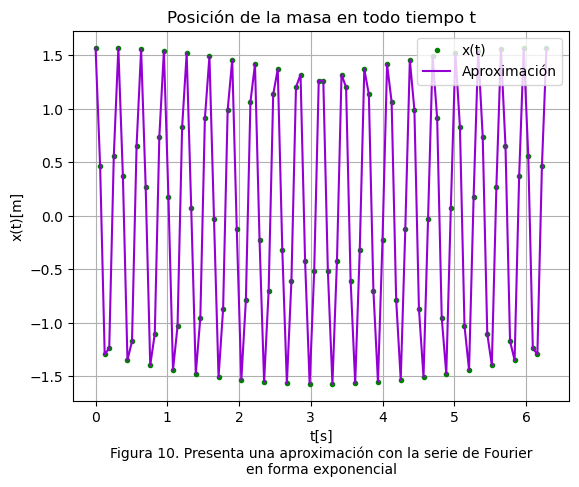

In [60]:
#Datos
m= 0.5  #[g]
k= 200 #[N/m]
xi= np.pi/2 #[m]
vi= 0       #[m/s]


def x(t):
  w= np.sqrt(k/m)
  c1= xi
  c2= vi/w

  x= c1*np.cos(w*t)+c2*np.sin(w*t)
  return x


def periodo(k,m):
  w=np.sqrt(k/m)
  T=(2*np.pi)/w

  return T

t_intervalo= np.linspace(0,2*np.pi,100)


n = 10
T = periodo(k,m)

c = np.zeros(2*n+1, dtype=np.complex128) # longitud de un N que toma valores positivos y negativos

for i in range(-n, n + 1):
    integrando = lambda t: x(t) * np.exp(-1j*2*np.pi*i*t/T) # i contador
    c[n + i] = 1 / T * sp.integrate.quad(integrando, -T/2, T/2)[0] # valores de cn únicamente


def s_f(t):
    s = np.zeros_like(t, dtype=np.complex128) # ceros complejos del tamaño de t
    for i in range(-n,n+1):
      s += c[n+i]*np.exp(1j*2*np.pi*i*t/T)
    return s # array complejo

plt.plot(t_intervalo, x(t_intervalo),'g.', label="x(t)")
plt.plot(t_intervalo, np.real(s_f(t_intervalo)),label="Aproximación",c="darkviolet")
plt.title("Posición de la masa en todo tiempo t")
plt.xlabel('''t[s]
Figura 10. Presenta una aproximación con la serie de Fourier
en forma exponencial''')
plt.ylabel("x(t)[m]")

plt.grid()
plt.legend(loc="upper right")

#**Conclusiones**

- En las figuras 8,9,10, se puede ver como la aproximación con serie Fourier es bastante óptima. En particular, la serie logra acercarse a la solución sinusoidal que se describe en la ecuación 10 para el sistema masa-resorte. En particular, en el ejemplo 2, la serie es exactamente la solución análitica de la ecuación diferencial que describe el movimiento de ese sistema masa-resorte ideal.


- Para el caso de la señal entrante del circuito CR, las definiciones de serie de fourier en las que se realizan arreglos o se utiliza el cálculo simbólico, el resultado se aleja bastante de lo esperado (como se ve en las figuras 4 y 5). Mientras que la serie de fourier en forma exponencial se aproxima mejor (como se ve en el ejemplo 1).

  En las series por definición y para funciones periódicas como el cálculo de cada término presenta un error asociado, entonces sumando los términos $a_n$ y sumando los términos $b_n$, para parte real e imaginaria, el error acumulado es mayor. Mientras que para la forma exponencial al ser compacta y tener en consideración la parte real e imaginaria en una sola sumatoria, logra reducir el error y aproximarse a lo esperado.

- En la figura 10, como x(t) describe un movimiento armónico continuo es posible que su serie de fourier se aproxime exactamente a la misma función. En este caso, la exactitud de los coeficientes de la serie mejora significativamente al emplear el método de la cuadratura en compración de utilizar el método del trapecio o de Simpson.

##**Referencias**

*   Bustos, S (2023). Proyecto. Github. https://github.com/S0ofiab/Proyecto


